## Unsupervised Learning
- Training data is samples $ \{x^{(1)}, x^{(2)}, x^{(3)}, .. , x^{(n)}\} $ without labels. $ x^{(i)} \in \mathbb{R}^d $
- Clustering is a type of unsupervised learning technique where we assign data points to a group based on their similarity
   - e.g. market segmentation

#### Cluster labels as a feature
- Adding a feature of cluster labels can help machine learning models untangle complicated relationships of space or proximity.


### K-means Clustering

[[sci-kit explanation](https://scikit-learn.org/stable/modules/clustering.html#k-means)]|
[[sci-kit code](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/cluster/_kmeans.py#L1126)]

The K-means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or **within-cluster sum-of-squares**

The K-means clustering algorithm is as follows:
 
1. **Initialize** cluster centroids $ \mu_1, \mu_2, ... , \mu_k $ randomly.

2. Repeat until convergence: {
    
    2.1. **Cluster assignment**
        For every data sample $i$, set
        $$ c(i) = {argmin}_{j} || x^{(i)} - \mu_j ||^2  $$
    2.2. **Centroid adjustment**
        For each centroid $j$, set
        $$ \mu_j = \frac{\sum_{i=1}^{n} 1\{c^{(i)}=j\}x^{(i)}}{\sum_{i=1}^{n}1\{c^{(i)}=j\}} $$

    }
    
The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

#### Cost function: distortion function
K-means is guaranteed to converge. The cost function is called **distortion function**, and measures sum of squared distances between sample points and the cluster centroid to which they are assigned. K-means is exactly **coordinate descent** on J.

$$ J(c,\mu) = \sum_{i=1}^{n}||x^{(i)} - \mu_{c^{(i)}} ||^2 $$

##### Remarks
- In Step 2.1, we assign to each data point the cluster it belongs to by minimizing the squared distance from centroid. 
   - we repeatedly minimize J with respect to $c$ (distances) while keeping $\mu$ (centroids) fixed
- In Step 2.2, we adjust the centroids by taking average of the points that are that cluster. $1$ is an indicator function which outputs $0$ or $1$.
   - and then, minimize J with respect to $\mu$ (centroids) while keeping $c$ (distances) fixed.
- This implies that $J$ must monotonically decrease (converge) and so would $c$ and $\mu$ (usually converge but can oscillate between few clustering with same cost)
- Distortion function is **non-convex**, can get stuck in local minima
- **How to initialize centroids randomly? (Step 1)**
   - sample K points randomly from dataset and assign them as centroids
- **How to avoid local minima?** 
   - run k-means mulitple times (50 to 1000 times) with different random initializions
- **How to determine K?**
   - by looking at the underlying task or by hand
   - elbow method (doesn't always work)
      - plot cost vs. number of clusters and look for elbow
- **What to do with a cluster with zero points?**
   - Option 1: remove it (leads to K-1 clusters)
   - Option 2: Randomly reassign (if you absolutely need K clusters)
- **K-means clustering creates a Voronoi tessallation of the feature space.** : expanding circles from centroids and seeing their overlaps


In [30]:
# load iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

In [41]:
K = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

predicted_labels = kmeans.labels_ 
cluster_centers = kmeans.cluster_centers_

### Visualizing the labels

##### First two features

(2.0, 4.4)

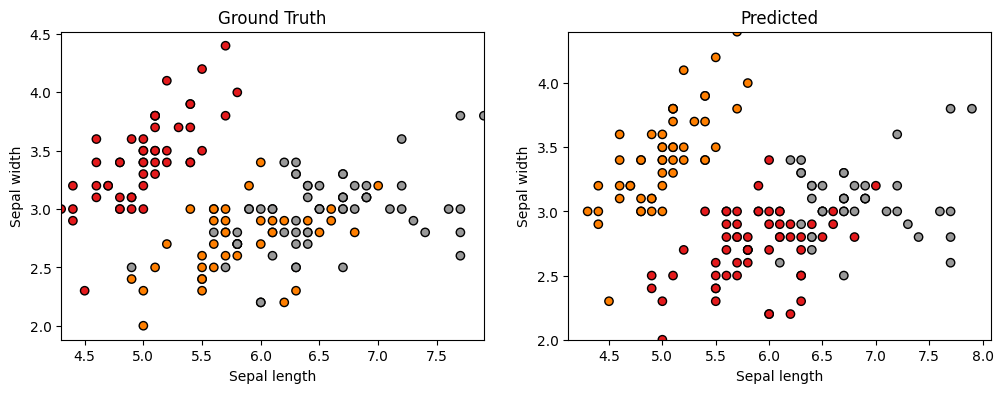

In [87]:
import matplotlib.pyplot as plt

labels = iris.target

# take first 2 features
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
ax2.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap=plt.cm.Set1, edgecolor="k")
ax1.set_xlabel("Sepal length")
ax1.set_ylabel("Sepal width")
ax1.set_title("Ground Truth")
ax2.set_xlabel("Sepal length")
ax2.set_ylabel("Sepal width")
ax2.set_title("Predicted")
ax1.set_xlim(X[:, 0].min(), X[:, 0].max())
ax2.set_ylim(X[:, 1].min(), X[:, 1].max())


##### PCA - first three components

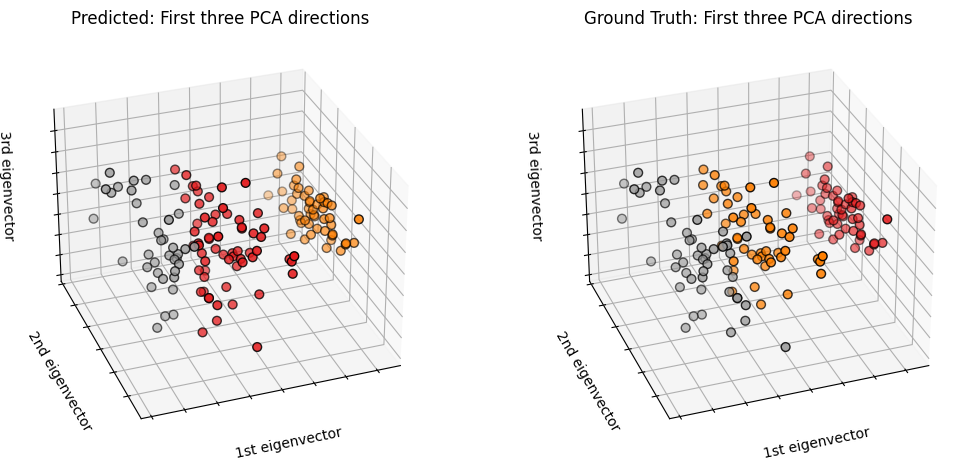

In [88]:
from sklearn.decomposition import PCA
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(25, 12))
ax = fig.add_subplot(211, projection="3d", elev=-150, azim=110)
ax1 = fig.add_subplot(221, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("Ground Truth: First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

ax1.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=predicted_labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax1.set_title("Predicted: First three PCA directions")
ax1.set_xlabel("1st eigenvector")
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel("2nd eigenvector")
ax1.yaxis.set_ticklabels([])
ax1.set_zlabel("3rd eigenvector")
ax1.zaxis.set_ticklabels([])

plt.show()

## How k-means goes wrong - Demonstration

#### Cons of inertia/distortion function
Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). **Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.**

[doclink](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html)

In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.




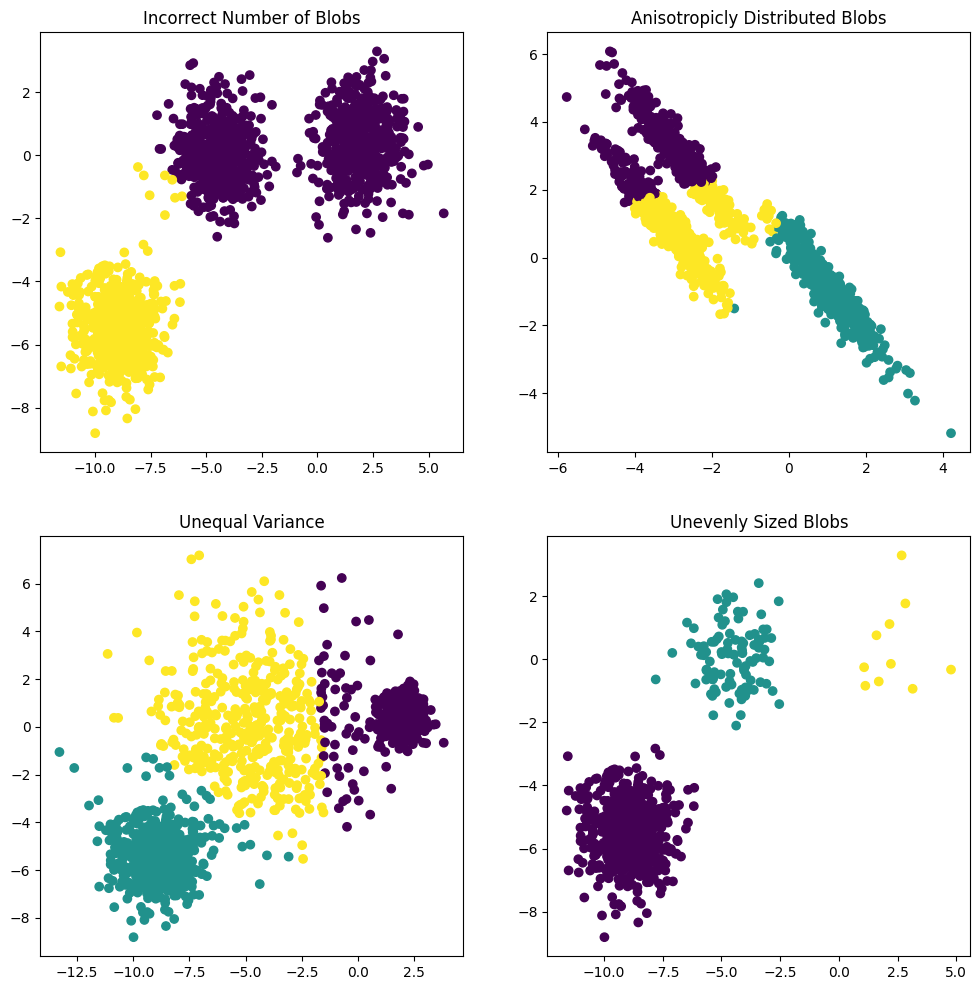

In [2]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## Source Code Analysis

[Source Code from scikit-learn](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/cluster/_kmeans.py#L1126)


### Remarks:
1. use init="k-means++" for faster convergence.  Selects initial cluster centers for k-mean clustering in a smart way
    to speed up convergence. see: Arthur, D. and Vassilvitskii, S.
    "k-means++: the advantages of careful seeding". ACM-SIAM symposium
    on Discrete algorithms. 2007
2. scikit runs algo 10 times by default (`n_init`)
3. `tol=0.0001` is default tolerance for convergence ( Frobenius norm of difference in centroids in two consecutive iterations )
4. **algorithms** to use: {"lloyd", "elkan"}
   - "lloyd": Expectation maximization
   - "elkan": uses triangular inequality. More useful on certain datasets with well-defined clusters. More memory intensive

5. **MiniBatchKMeans** : Alternative online implementation that does incremental
        updates of the centers positions using mini-batches.
        For large scale learning (say n_samples > 10k) MiniBatchKMeans is
        probably much faster than the default batch implementation.

#### Avg. Complexity
The average complexity is given by O(k n T), where n is the number of samples and T is the number of iteration.

#### Worst Complexity
O(n^(k+2/p)) with n = n_samples, p = n_features.

In practice, the k-means algorithm is very fast (one of the fastest
    clustering algorithms available).

## Cluster labels as a feature
- **When used for feature engineering, we could attempt to discover groups of customers representing a market segment, for instance, or geographic areas that share similar weather patterns. Adding a feature of cluster labels can help machine learning models untangle complicated relationships of space or proximity.**
- Clustering works as vector quantization (multi-dim feature) or discretization/binning (single dim feature)
[Link for deeper explanation](https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means)
- Cluster feature is `categorical`
   - one-hot encode
   

## References

1. Stanford - Machine Learning - Andrew Ng
2. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
3. [Kaggle notebook - Ryanholbrook](https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means)